# Cookie Cats oyunu versiyonları üzerine A/B Testi

A/B Testinin kapsamı; oyunda anlamı olan bir geçiş kapısının, 30.seviyede geçilmesi ve 40.seviyede geçilmesi şeklinde işleyen 2 ayrı versiyonuna dairdir. sum_gamerounds sütunu, userid si görülen kullanıcının toplam kaç round oyun oynadığını veriyor. ret_1 ve ret_2 ise 1 gün içerisinde ve 7 gün içerisinde oyuna dönüşleri ile ilgilidir.

_______________________________________________________________________________________________________________________________

In [17]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns

from scipy.stats import shapiro
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df = pd.read_csv("cookie_cats.csv")

In [6]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [7]:
df.userid.nunique() == df.shape[0]

True

In [8]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,49854.0


In [9]:
df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17,52.456264,256.716423,49854
gate_40,45489,16,51.298776,103.294416,2640


In [15]:
df = df[df.sum_gamerounds < df.sum_gamerounds.max()] # outlier deleting

In [16]:
df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17,51.342111,102.057598,2961
gate_40,45489,16,51.298776,103.294416,2640


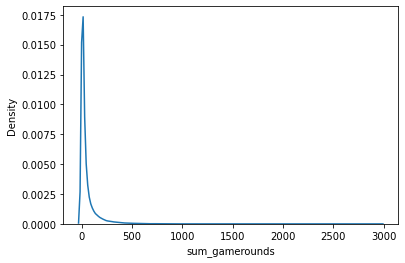

In [21]:
sns.kdeplot(data=df, x="sum_gamerounds");

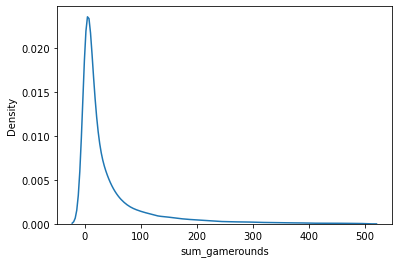

In [20]:
sns.kdeplot(data=df[df['sum_gamerounds'] < 500], x="sum_gamerounds");

In [22]:
df.groupby("sum_gamerounds").userid.count().reset_index().head(20)

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [23]:
df.groupby("sum_gamerounds").userid.count().loc[[30,40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [24]:
df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17,51.342111,102.057598,2961
gate_40,45489,16,51.298776,103.294416,2640


In [25]:
df.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median       mean         std   max
version retention_1                                            
gate_30 False        24665       6  16.359092   36.528426  1072
        True         20034      48  94.411700  135.037697  2961
gate_40 False        25370       6  16.340402   35.925756  1241
        True         20119      49  95.381182  137.887256  2640

In [26]:
df.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median        mean         std   max
version retention_7                                             
gate_30 False        36198      11   25.796508   43.316158   981
        True          8501     105  160.117516  179.358560  2961
gate_40 False        37210      11   25.856356   44.406112  2640
        True          8279     111  165.649837  183.792499  2294

In [27]:
df["Retention"] = np.where((df.retention_1 == True) & (df.retention_7 == True), 1,0)
df.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count  median        mean         std   max
version Retention                                             
gate_30 0          38023      12   28.070273   48.017452  1072
        1           6676     127  183.886309  189.626390  2961
gate_40 0          38983      12   28.103353   48.927850  2640
        1           6506     133  190.282355  194.220077  2294

In [28]:
df["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), df.retention_1, df.retention_7))
df.groupby(["version", "NewRetention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6,11.819746,21.642643,981
1,gate_30,False-True,1825,43,73.169315,93.222330,1072
2,gate_30,True-False,13358,33,49.694490,58.125396,918
3,gate_30,True-True,6676,127,183.886309,189.626390,2961
4,gate_40,False-False,23597,6,11.913294,20.901020,547
5,gate_40,False-True,1773,47,75.261139,94.478048,1241
6,gate_40,True-False,13613,32,50.025490,60.924587,2640
7,gate_40,True-True,6506,133,190.282355,194.220077,2294


In [29]:
df["version"] = np.where(df.version == "gate_30", "A", "B")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True


In [31]:
def AB_Test(dataframe, group, target):
    from scipy.stats import shapiro
    import scipy.stats as stats
    
    # Split ediyoruz: A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (ntA == False) & (ntB == False): # "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        
    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")
    
    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return temp

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.025446,A/B groups are not similar!


In [ ]:
AB_Test(dataframe=df, group = "version", target = "sum_gamerounds")

In [32]:
df.groupby("version").retention_1.mean(), df.groupby("version").retention_7.mean()

(version
 A    0.448198
 B    0.442283
 Name: retention_1, dtype: float64,
 version
 A    0.190183
 B    0.182000
 Name: retention_7, dtype: float64)